In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df = pd.read_csv("spam.csv")

In [3]:
df.head()

,Category,Message
0,not spam,"Go until jurong point, crazy.. Available only ..."
1,not spam,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,not spam,U dun say so early hor... U c already then say...
4,not spam,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

In [5]:
spam_messages = ' '.join(df[df["Category"]=="spam"]["Message"])
non_spam_messages = ' '.join(df[df["Category"]=="not spam"]["Message"])

In [6]:
wc = WordCloud(width = 800, 
               height = 800, 
               background_color ='white',  
               min_font_size = 10)

In [7]:
wc.generate(non_spam_messages)

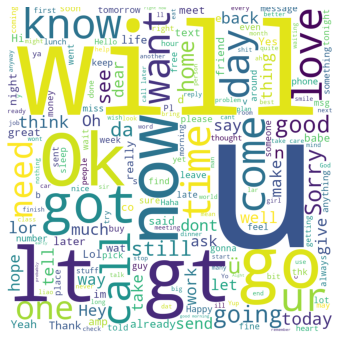

In [8]:
plt.figure(figsize = (6,6)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

In [9]:
wc = WordCloud(width = 800, 
               height = 800, 
               background_color ='white',  
               min_font_size = 10)

In [10]:
wc.generate(spam_messages)

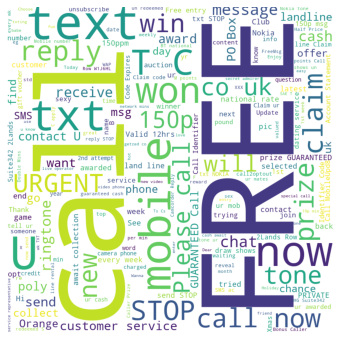

In [11]:
plt.figure(figsize = (6,6)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

In [12]:
# feature and target
X = df["Message"]
y = df["Category"]

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [15]:
cv = CountVectorizer(stop_words="english")
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [16]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [17]:
model1 = DecisionTreeClassifier()
model1.fit(X_train_cv, y_train)

DecisionTreeClassifier()

In [18]:
y_pred = model1.predict(X_test_cv)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1442
           1       0.90      0.86      0.88       230

    accuracy                           0.97      1672
   macro avg       0.94      0.92      0.93      1672
weighted avg       0.97      0.97      0.97      1672



In [19]:
# tfidf
tf = TfidfVectorizer(stop_words="english")
X_train_tf = tf.fit_transform(X_train)
X_test_tf = tf.transform(X_test)

In [20]:
model2 = DecisionTreeClassifier()
model2.fit(X_train_tf, y_train)

DecisionTreeClassifier()

In [21]:
y_pred = model2.predict(X_test_tf)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1442
           1       0.92      0.85      0.88       230

    accuracy                           0.97      1672
   macro avg       0.95      0.92      0.93      1672
weighted avg       0.97      0.97      0.97      1672



In [22]:
# Application

sms1 = "Hey, how are you ? call me as soon as possible"

sms2 = "call on this number 1233432 and get a chance to win FREE mobile, claim it quickly"

In [23]:
def predict_sms(sms):
    sms_cv = cv.transform([sms])
    output = model1.predict(sms_cv)
    return le.inverse_transform(output)[0]

In [24]:
predict_sms(sms1)

'not spam'

In [25]:
predict_sms(sms2)

'spam'